In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from collections import Counter

In [3]:
startups=pd.read_csv("50_Startups.csv")
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups.shape

(50, 5)

In [7]:
startups=startups.drop_duplicates(keep='first')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
startups.shape

(50, 5)

In [9]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
startups.columns.str.replace(' ','')

Index(['R&DSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [11]:
startups.sort_values(by="Profit",ascending=False).head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
def min_max_values(col):
    top=startups[col].idxmax()
    top_obs=pd.DataFrame(startups.loc[top])
    bottom=startups[col].idxmin()
    bot_obs=pd.DataFrame(startups.loc[bottom])
    min_max_obs=pd.concat([top_obs,bot_obs],axis=1)
    return min_max_obs

In [13]:
min_max_values('Profit')

,0,49
R&D Spend,165349,0
Administration,136898,116984
Marketing Spend,471784,45173.1
State,New York,California
Profit,192262,14681.4


(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <a list of 10 Patch objects>)

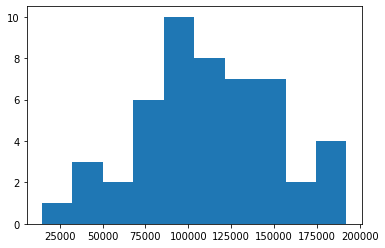

In [14]:
plt.hist(startups['Profit'])

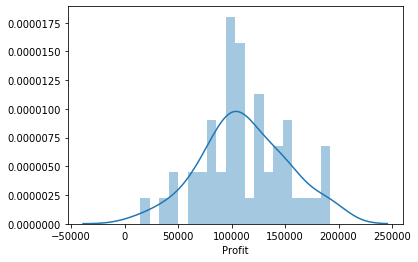

In [15]:
sb.distplot(startups['Profit'],bins=20)

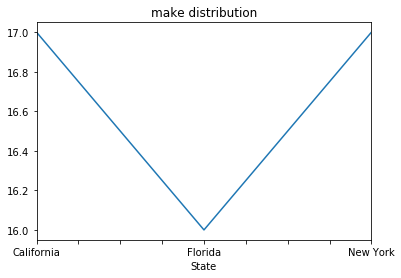

In [16]:
start=startups.groupby('State').size()
start.plot(title='make distribution')

In [17]:
startups.corr()['Profit']

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

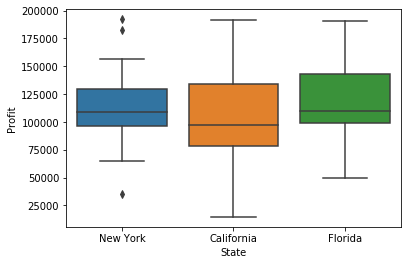

In [18]:
sb.boxplot(x='State',y='Profit',data=startups)

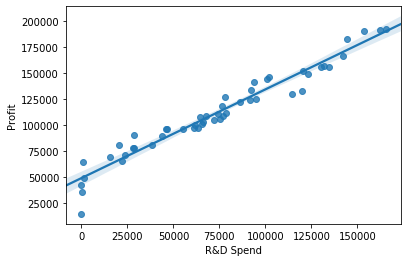

In [19]:
sb.regplot(startups['R&D Spend'],startups['Profit'])

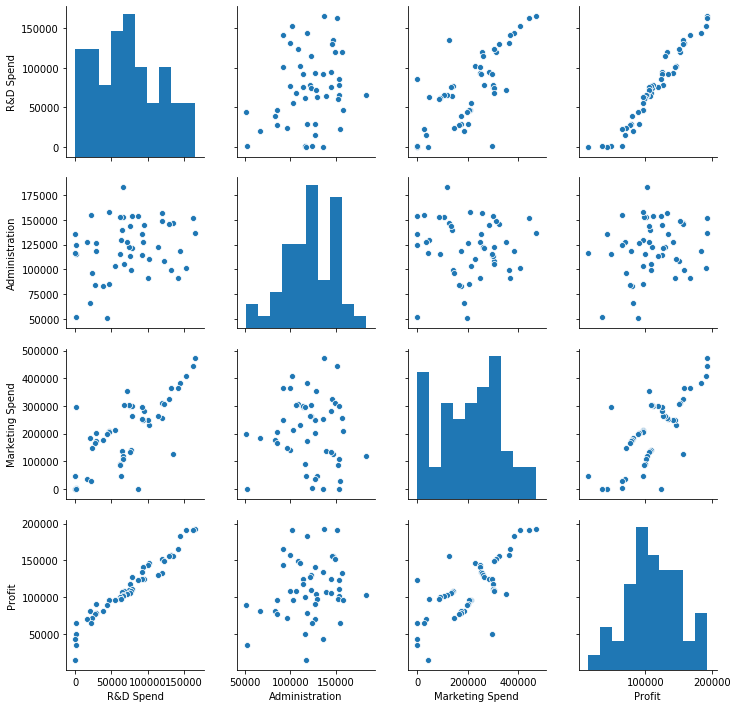

In [20]:
sb.pairplot(startups)

In [21]:
startups.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


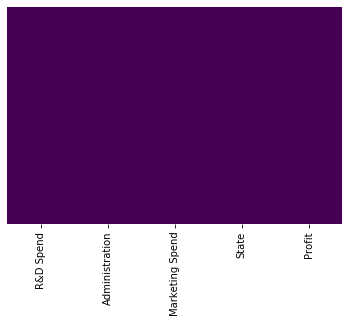

In [22]:
sb.heatmap(startups.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [24]:
Y=startups.iloc[:,-1:]
Y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [25]:
X=startups.iloc[:,:-1]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [26]:
Z=X.iloc[:,:-1]
Z

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [27]:
A=pd.get_dummies(X)
A

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [28]:
LinReg=LinearRegression(normalize=True)
LinReg.fit(A,Y)
LinReg.score(A,Y)

0.9507524843355148

In [29]:
LinReg=LinearRegression(normalize=True)
B=LinReg.fit(Z,Y)
B.score(Z,Y)

0.9507459940683246

In [30]:
from sklearn.model_selection import train_test_split
A_test,A_train,Y_test,Y_train=train_test_split(A,Y,test_size=0.2,random_state=0)


In [31]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(A_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred=regression.predict(A_test)
y_pred


array([[101542.16079665],
       [ 95366.6498966 ],
       [114989.56054536],
       [ 85366.66005856],
       [129438.68167924],
       [157637.92613197],
       [148726.2683983 ],
       [ 55091.85470335],
       [ 67347.83160341],
       [104523.53759991],
       [148477.42589554],
       [109436.93745482],
       [111244.88465703],
       [118202.71379539],
       [ 77746.76654919],
       [116788.09720347],
       [ 66413.44995065],
       [147633.14277396],
       [128750.78275179],
       [107419.73383307],
       [164572.67945785],
       [125996.49637984],
       [ 77600.53602864],
       [ 56409.03260636],
       [182884.09280194],
       [130599.98780093],
       [102241.71914096],
       [123011.92790612],
       [169318.03273931],
       [108798.92213081],
       [ 73712.25397654],
       [109270.93780398],
       [126828.71623259],
       [159794.11813918],
       [ 92527.25805403],
       [ 47789.0612887 ],
       [171824.13112433],
       [184465.14828294],
       [ 547

In [33]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
score

0.9101215232809357